###**Step 1: Import Necessary Libraries**

In [5]:

import pandas as pd

import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectKBest, f_regression ,SelectPercentile , f_classif

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectPercentile, f_classif # Import SelectPercentile and f_classif

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans # For K-Means Clustering

from sklearn.decomposition import PCA # For Principal Component Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # For LDA

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC



###**Step 2: Load the Data**

In [6]:
dataframe=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT Network Intrusion Dataset.csv')
dataframe.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [7]:
dataframe.shape


(625783, 86)

In [8]:
dataframe.isnull().sum().sum()

0

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [10]:
dataframe.nunique()

Flow_ID     64064
Src_IP      57985
Src_Port    11205
Dst_IP        478
Dst_Port     1034
            ...  
Idle_Max    11956
Idle_Min    10872
Label           2
Cat             5
Sub_Cat         9
Length: 86, dtype: int64

###**Step 3: Data Exploration**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Summary statistics
dataframe.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000


In [13]:
dataframe.describe(include="all")

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
count,625783,625783,625783.000000,625783,625783.000000,625783.000000,625783,625783.000000,625783.000000,625783.00000,...,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783,625783,625783
unique,64064,57985,NaN,478,NaN,NaN,4304,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,9
top,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,NaN,192.168.0.13,NaN,NaN,25/07/2019 03:25:05 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anomaly,Mirai,Mirai-UDP Flooding
freq,51852,222096,NaN,164532,NaN,NaN,3189,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585710,415677,183554
mean,NaN,NaN,35026.156190,NaN,16387.027479,9.971436,NaN,635.422865,1.675566,1.46853,...,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459,NaN,NaN,NaN
std,NaN,NaN,24721.047752,NaN,17550.363037,5.379857,NaN,3496.740723,4.309970,1.21949,...,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,9020.000000,NaN,8899.000000,6.000000,NaN,76.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000,NaN,NaN,NaN
50%,NaN,NaN,51991.000000,NaN,9020.000000,6.000000,NaN,132.000000,1.000000,1.00000,...,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000,NaN,NaN,NaN
75%,NaN,NaN,56361.000000,NaN,10101.000000,17.000000,NaN,221.000000,2.000000,2.00000,...,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000,NaN,NaN,NaN


In [14]:
# Checking for missing values
dataframe.isnull().sum()

Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

In [15]:
# Data types of columns
dataframe.dtypes

Flow_ID      object
Src_IP       object
Src_Port      int64
Dst_IP       object
Dst_Port      int64
             ...   
Idle_Max    float64
Idle_Min    float64
Label        object
Cat          object
Sub_Cat      object
Length: 86, dtype: object

In [16]:
dataframe.duplicated().sum()

164087

In [17]:
Temp_Df=dataframe.copy()
Temp_Df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [18]:
Temp_Df=Temp_Df.drop_duplicates()
Temp_Df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [19]:
Temp_Df.duplicated().sum()

0

In [20]:
Unique_Values = Temp_Df.nunique() == 1
Unique_perc = Unique_Values[Unique_Values ==True]
Unique_perc

Fwd_PSH_Flags        True
Fwd_URG_Flags        True
Fwd_Byts/b_Avg       True
Fwd_Pkts/b_Avg       True
Fwd_Blk_Rate_Avg     True
Bwd_Byts/b_Avg       True
Bwd_Pkts/b_Avg       True
Bwd_Blk_Rate_Avg     True
Init_Fwd_Win_Byts    True
Fwd_Seg_Size_Min     True
dtype: bool

In [21]:
Drop_Unique_perc = ['Fwd_PSH_Flags', 'Fwd_URG_Flags',  'Fwd_Byts/b_Avg',  'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg',  'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min']

In [22]:
for col in Drop_Unique_perc:
 del Temp_Df[col]

In [23]:
Temp_Df.shape

(461696, 76)

In [24]:
UniqueCheck = Temp_Df.nunique() ==1
unique_all = UniqueCheck[UniqueCheck==True]
unique_all

Series([], dtype: bool)

In [25]:
columns = Temp_Df.columns.tolist()
cat_columns = Temp_Df.select_dtypes(['object']).columns
label_encoder = LabelEncoder()
Temp_Df[cat_columns] = Temp_Df[cat_columns].apply(lambda x:label_encoder.fit_transform(x.astype(str)))

In [26]:
Temp_Df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,12446,25883,10000,203,10101,17,3496,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0,2,2
1,22760,34617,2179,200,554,6,3664,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0,0,0
2,12691,25886,52727,200,9020,6,2082,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0,4,8
3,12704,25886,52964,200,9020,6,791,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,0,2,4
4,611,25881,36763,317,1900,17,1040,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,0,2,4


In [27]:
#x = Temp_Df.drop(["Label"], axis=1) #category subcategory
#y = Temp_Df["Label"]

In [28]:
x = Temp_Df.drop(["Label", "Cat" ,"Sub_Cat"], axis=1) #category subcategory
y = Temp_Df["Label"] # Target variables



In [32]:
from numpy.lib.function_base import percentile
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'x' and 'y' are your data and labels, replace them with your actual data

# Handle missing values and scale the data
x[np.isinf(x)] = np.nan
x = x.astype(np.float64)
imputer = SimpleImputer(strategy='mean')
x_imputer = imputer.fit_transform(x)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputer)

# Define your feature selector, e.g., SelectKBest with k features
selector = SelectKBest(k=5)  # Change 'k' to the number of features you want to select
x_selected = selector.fit_transform(x_scaled, y)

num_features = x_selected.shape[1]

result = pd.DataFrame(columns=['K', 'Acc', 'P', 'R', 'F1'])

for i in range(1, num_features + 1):
    acc = []
    pre = []
    recall = []
    f1 = []

    for rand in range(15):  # Change it to 5, 10, or 15 as needed
        x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.33, random_state=rand)
        DT = DecisionTreeClassifier()

        DT.fit(x_train, y_train)
        y_pred = DT.predict(x_test)

        precision_ = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall_ = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1_ = f1_score(y_test, y_pred, average='macro', zero_division=0)

        accuracy_ = accuracy_score(y_test, y_pred)

        acc.append(accuracy_)
        pre.append(precision_)
        recall.append(recall_)
        f1.append(f1_)

    result.loc[len(result)] = [i, np.mean(acc), np.mean(pre), np.mean(recall), np.mean(f1)]

print(result)


     K       Acc         P         R        F1
0  1.0  0.999583  0.999068  0.998213  0.998640
1  2.0  0.999583  0.999067  0.998211  0.998639
2  3.0  0.999583  0.999065  0.998211  0.998637
3  4.0  0.999585  0.999066  0.998224  0.998644
4  5.0  0.999584  0.999068  0.998219  0.998643


In [36]:
sorted_res = result.sort_values(by=['F1', 'Acc'], ascending=[False, False])

sorted_res

,K,Acc,P,R,F1
3,4.0,0.999585,0.999066,0.998224,0.998644
4,5.0,0.999584,0.999068,0.998219,0.998643
0,1.0,0.999583,0.999068,0.998213,0.998640
1,2.0,0.999583,0.999067,0.998211,0.998639
2,3.0,0.999583,0.999065,0.998211,0.998637


In [37]:
optimal_k = sorted_res.iloc[0]['K']
optimal_k


4.0

In [38]:
#which is best
classifiers={
    "Decision Tree":DecisionTreeClassifier(),
    "Native Bayes":GaussianNB(),
    "KNN":KNeighborsClassifier(n_neighbors=6),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machines" : LinearSVC()

}

In [39]:
all_results = pd.DataFrame(columns=['classifier','Acc','P','R','F1'])
avg_results = pd.DataFrame(columns=['classifier','Acc','P','R','F1'])

for classifier_name,class_obj in classifiers.items():
  acc = []
  pre = []
  recall = []
  f1 = []

  for r in range(10):
    x_train, x_test, y_train, y_test= train_test_split (x , y, test_size=0.33,random_state=r)

    imputer = SimpleImputer(strategy='mean')
    x_train_imputed = imputer.fit_transform(x_train)
    x_test_imputed = imputer.transform(x_test)

    selector = SelectKBest(f_regression, k=int(optimal_k))
    x_train_selected = selector.fit_transform(x_train_imputed ,y_train )
    x_test_selected = selector.transform(x_test_imputed)

    class_obj.fit(x_train_selected , y_train )
    y_pred = class_obj.predict(x_test_selected)

    precision_ = precision_score(y_test , y_pred,average='macro' ,zero_division=0)
    recall_ = recall_score(y_test , y_pred, average='macro' ,zero_division=0 )
    f1_ = f1_score(y_test , y_pred, average='macro' ,zero_division=0 )
    accuracy_ = accuracy_score (y_test , y_pred)

    acc.append(accuracy_)
    pre.append(precision_)
    recall.append(recall_)
    f1.append(f1_)

    all_results.loc[len(all_results)] = [classifier_name,accuracy_, precision_ ,recall_, f1_]

  avg_results.loc[len(avg_results)] = [classifier_name, np.mean(acc), np.mean(pre),np.mean(recall), np.mean(f1)]

avg_results








/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

,classifier,Acc,P,R,F1
0,Decision Tree,0.999597,0.999167,0.998209,0.998687
1,Native Bayes,0.899998,0.715507,0.868147,0.762499
2,KNN,0.999069,0.998257,0.995672,0.996960
3,Random Forest,0.999590,0.999292,0.998041,0.998665
4,Support Vector Machines,0.893486,0.542509,0.639305,0.570280


<Figure size 640x480 with 0 Axes>

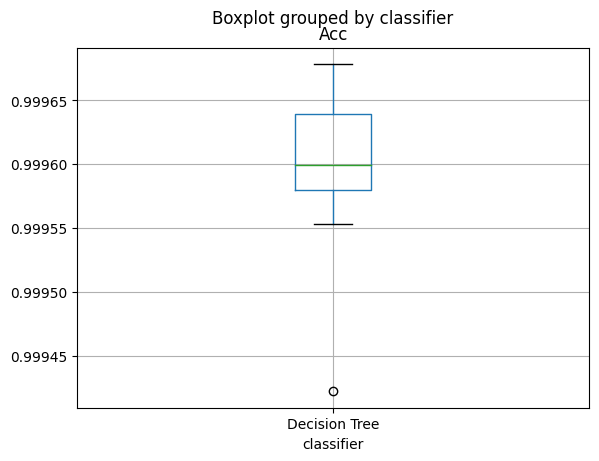

<Figure size 640x480 with 0 Axes>

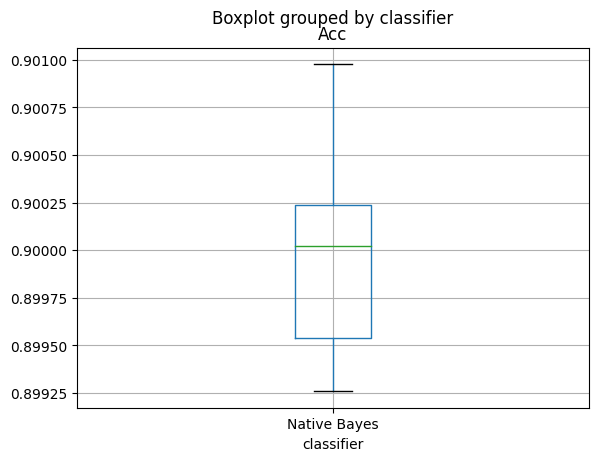

<Figure size 640x480 with 0 Axes>

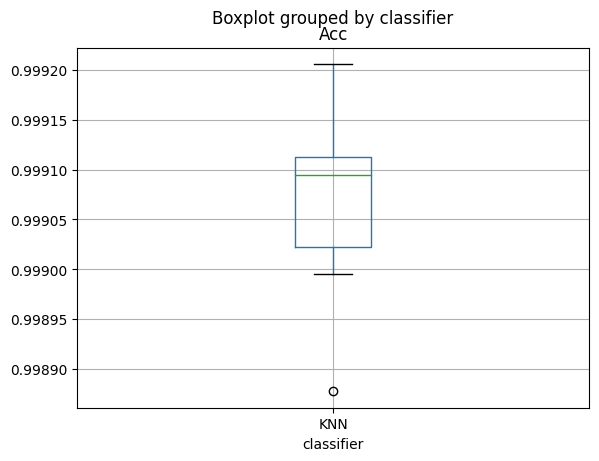

<Figure size 640x480 with 0 Axes>

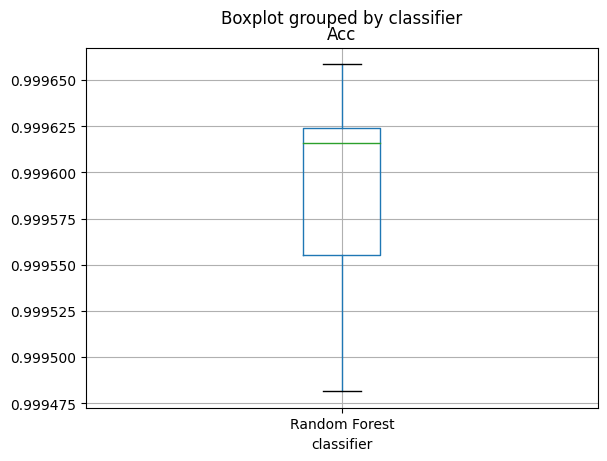

<Figure size 640x480 with 0 Axes>

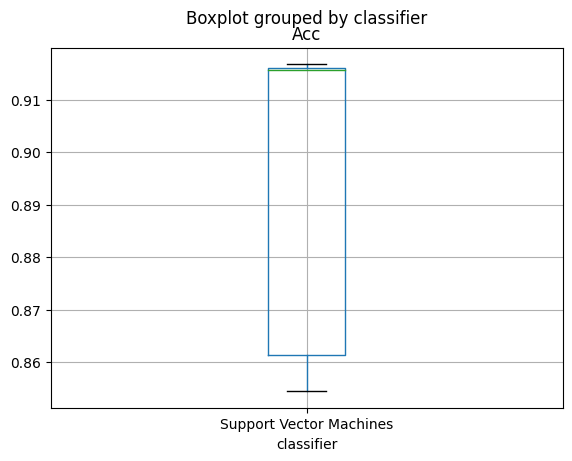

In [40]:
for classifier in all_results['classifier'].unique():
  subset = all_results[all_results['classifier']==classifier]
  plt.figure()
  box = subset.boxplot(column='Acc',by='classifier')
  plt.show()


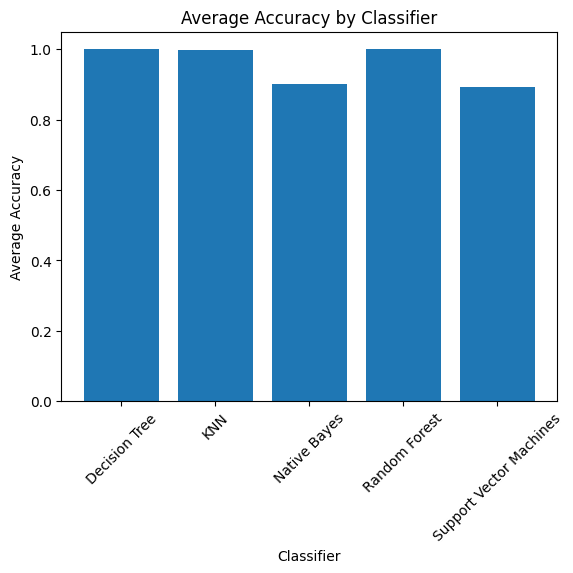

In [41]:
avg_results_grouped = avg_results.groupby('classifier').mean()

plt.figure()
plt.bar(avg_results_grouped.index ,avg_results_grouped['Acc'])
plt.xlabel('Classifier')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy by Classifier')
plt.xticks(rotation=45)
plt.show()



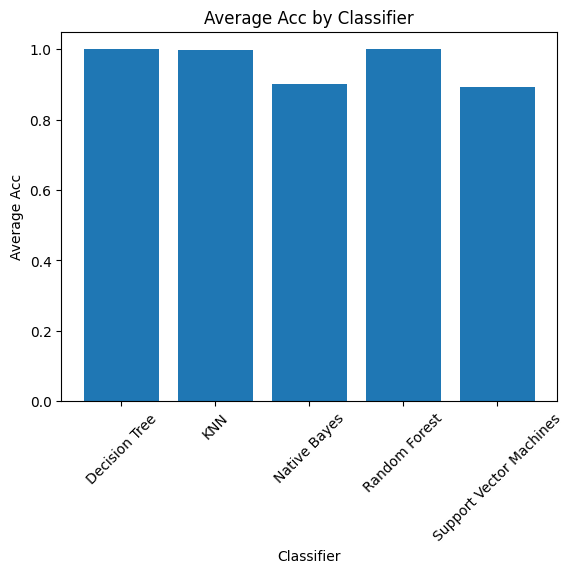

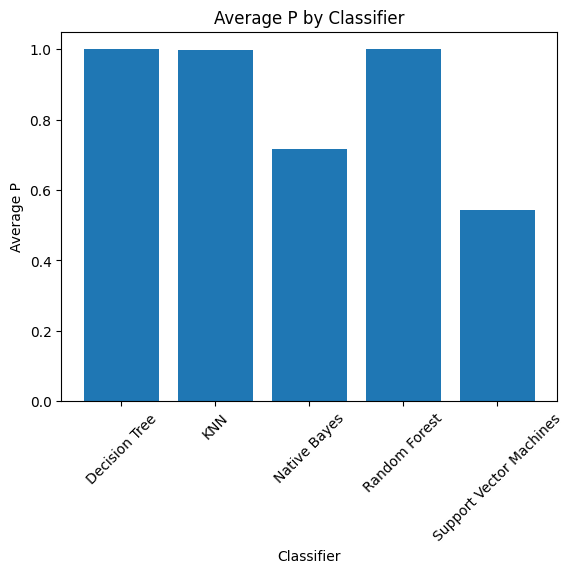

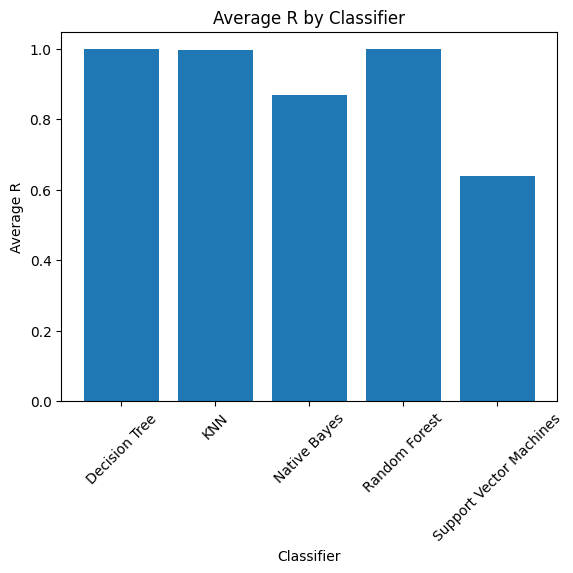

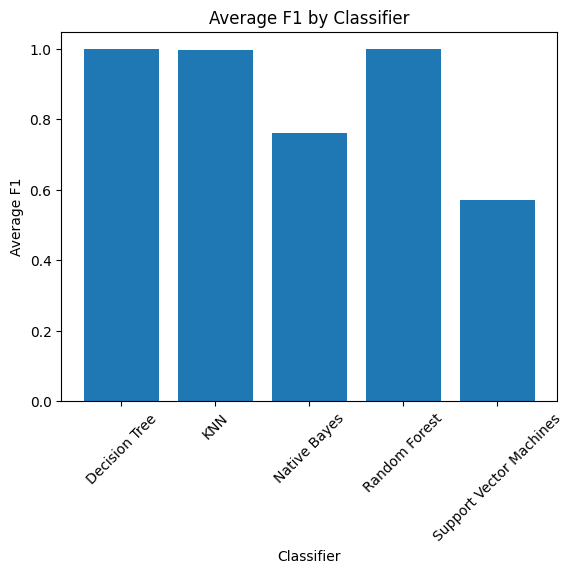

In [42]:

avg_results_grouped = avg_results.groupby('classifier').mean()

metrics = ['Acc' , 'P','R','F1']

for metric in metrics:
  plt.figure()
  plt.bar(avg_results_grouped.index ,avg_results_grouped[metric])
  plt.xlabel('Classifier')
  plt.ylabel(f'Average {metric}')
  plt.title(f'Average {metric} by Classifier')
  plt.xticks(rotation=45)
  plt.show()

